## In this notebook, we give many example of simple regression tasks

The goal is to analyze the behavior of regression process. We will look at the obtained solution in different situations:
* when using the direct solution, both in the under and over-parametrized regime
* using gradient descent to illustrate the early stopping phenomena
* introducing a L2 regularization

We will also have the occasion to see the use non-linear basis function such as Gaussian functions.

This is the typical library that we will need. Of course there are other libraries that can be used to to all this in a quicker way. Yet we insist on the fact that we control all steps in the following cells.

In [39]:
import numpy as np
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

We will generate some artificial dataset for the polynomial regression. We use
$$
 y = \sum_i^d a_i x_i^i + \epsilon
$$
up to a certain max degree d; and $\epsilon$ is a Gaussian noise with some variance.

Poly deg= [ 0.24406752  1.07594683  0.51381688  0.22441591 -0.381726  ]


Text(0.5, 1.0, 'Scatter plot of the dataset')

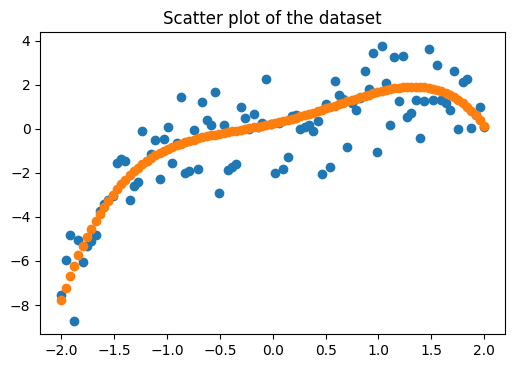

In [84]:
# Generate random dataset
np.random.seed(0)
dsize = 100
deg_true = 5

x = np.linspace(-2, 2, dsize)
y = np.zeros(dsize)
y_f = np.zeros(dsize)
coef = np.random.random(size=(deg_true))*5-2.5
print('Poly deg=',coef)
for i in range(deg_true):
    y += coef[i]*x**i + np.random.normal(0, 0.5, size=100)
    y_f += coef[i]*x**i
    
plt.figure(dpi=100)
plt.scatter(x,y)
plt.scatter(x,y_f)
plt.title('Scatter plot of the dataset')

We need to the following:
* define the degree of the polynomial we want to use
* shuffle the dataset and extract the test set from it

In [85]:

# Split data into training and test sets
split = int(len(x) * 0.8)
PERM = np.random.permutation(dsize)
x = x[PERM]
y = y[PERM]
y_f = y_f[PERM]
x_train, y_train = x[:split], y[:split]
x_test, y_test = x[split:], y[split:]


We first define a function to create the the polynomial values for the entries

In [86]:
# For a given X, return \sum_i X^i
def PolynomialFeat(X,deg):
    X_ = np.array(X**0).reshape(X.shape[0],1)
    for i in range(deg):
        X_ = np.concatenate((X_,(X**(i+1)).reshape(X.shape[0],1)),1)
    return X_

We now  solve the regression problem using the exact formula
$$
 \hat{\boldsymbol{w}} = (\phi \phi^T)^{-1} \phi^T \boldsymbol{y} 
$$

In [87]:
# Initialize arrays to store error values and degrees
degrees = np.arange(1, 20)
train_errors = np.zeros(len(degrees))
test_errors = np.zeros(len(degrees))

best_err = 1e10

# Loop over polynomial degrees and calculate error
for i, degree in enumerate(degrees):
    # Create polynomial features
    X_train_poly = PolynomialFeat(x_train,degree) 
    X_test_poly = PolynomialFeat(x_test,degree) 

    # Fit model
    w = np.linalg.pinv((X_train_poly.T @ X_train_poly)) @ X_train_poly.T @ y_train

    # Calculate error
    pr_train = w @ X_train_poly.T
    pr_test = w @ X_test_poly.T
    train_errors[i] = np.mean((pr_train - y_train) ** 2)
    test_errors[i] = np.mean((pr_test - y_test) ** 2)
    
    if test_errors[i] < best_err:
        best_err = test_errors[i]
        best_pr = pr_train


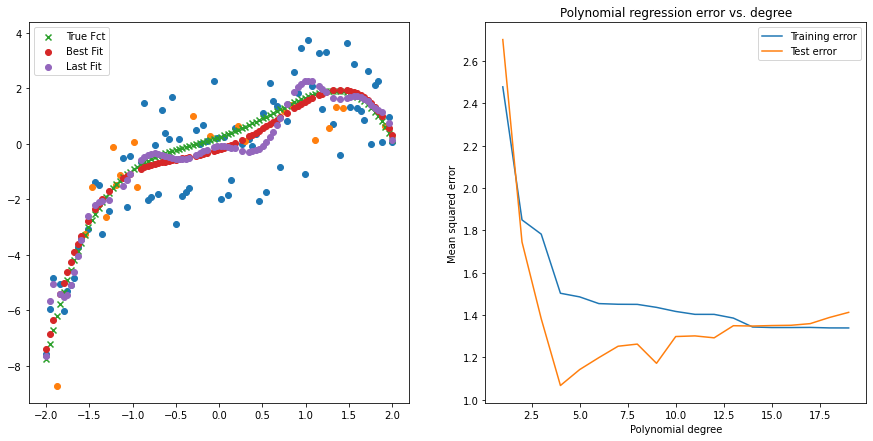

In [93]:
# Plot results
f,ax = plt.subplots(1,2,figsize=(15,7))
# We show the train/test dataset and the best curve and the last one
ax[0].scatter(x_train,y_train)
ax[0].scatter(x_test,y_test)
ax[0].scatter(x,y_f,marker='x',label='True Fct')
ax[0].scatter(x_train,best_pr,label='Best Fit')
ax[0].scatter(x_train,pr_train,label='Last Fit')
ax[0].legend()
# We show the train/test error curve as a function of the degree of the polynomial
ax[1].plot(degrees, train_errors, label='Training error')
ax[1].plot(degrees, test_errors, label='Test error')
ax[1].set_xlabel('Polynomial degree')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Polynomial regression error vs. degree')
# ax[1].set_yscale('log')
plt.legend()
plt.show()

## TODO:
Can you change the basis to use Gaussian functions ?

In [46]:
def GaussianBasis(X,μ,s):
    X_ = np.array(np.exp(-X**2 / (2*s))).reshape(X.shape[0],1)
    for i in range(μ.shape[0]):
        X_ = np.concatenate((X_,np.exp(-(X-μ[i])**2 / (2*s)).reshape(X.shape[0],1)),1)
    return X_

In [98]:
# Initialize arrays to store error values and degrees
nFeats = np.arange(1, 50)
train_errors = np.zeros(len(nFeats))
test_errors = np.zeros(len(nFeats))

best_err = 1e10
s = 0.1

# Loop over polynomial degrees and calculate error
for i, feat in enumerate(nFeats):
    μ = np.linspace(-2,2,feat)
    
    # Create polynomial features
    X_train_gauss = GaussianBasis(x_train,μ,s)
    X_test_gauss = GaussianBasis(x_test,μ,s) 

    # Fit model
    w = np.linalg.pinv((X_train_gauss.T @ X_train_gauss)) @ X_train_gauss.T @ y_train

    # Calculate error
    pr_train = w @ X_train_gauss.T
    pr_test = w @ X_test_gauss.T
    train_errors[i] = np.mean((pr_train - y_train) ** 2)
    test_errors[i] = np.mean((pr_test - y_test) ** 2)
    
    if test_errors[i] < best_err:
        best_err = test_errors[i]
        best_pr = pr_train


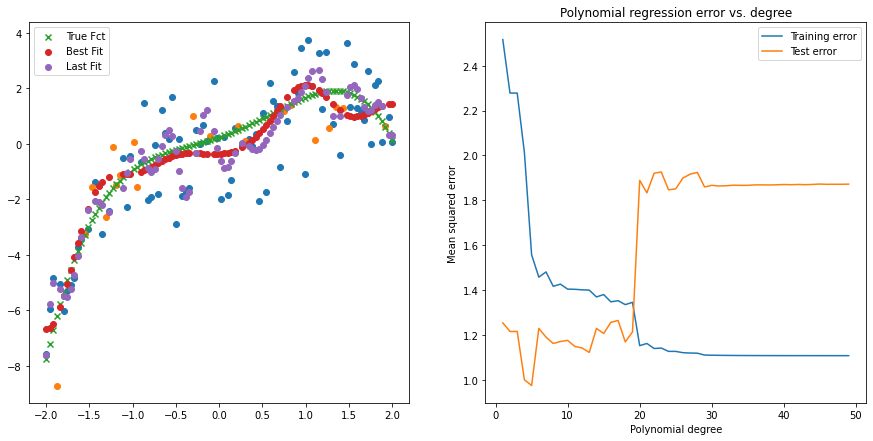

In [100]:
# Plot results
f,ax = plt.subplots(1,2,figsize=(15,7))
# We show the train/test dataset
ax[0].scatter(x_train,y_train)
ax[0].scatter(x_test,y_test)
ax[0].scatter(x,y_f,marker='x',label='True Fct')
ax[0].scatter(x_train,best_pr,label='Best Fit')
ax[0].scatter(x_train,pr_train,label='Last Fit')
ax[0].legend()

# We show the train/test error curve as a function of the degree of the polynomial
ax[1].plot(nFeats, train_errors, label='Training error')
ax[1].plot(nFeats, test_errors, label='Test error')
ax[1].set_xlabel('Polynomial degree')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Polynomial regression error vs. degree')
# ax[1].set_yscale('log')
plt.legend()
plt.show()


## TODO:
* can you implement a L2 Regularization and see what happen ?

In that case, the direct solution is given by
$$
  \hat{\boldsymbol{w}} = \left[\phi \phi^T + \lambda_2 \mathbb{1}\right]^{-1}\phi \boldsymbol{y}
$$

In [101]:
# Initialize arrays to store error values and degrees
nFeats = np.arange(1, 50)
train_errors = np.zeros(len(nFeats))
test_errors = np.zeros(len(nFeats))

best_err = 1e10
s = 0.1
λ2 = 0.01

# Loop over polynomial degrees and calculate error
for i, feat in enumerate(nFeats):
    μ = np.linspace(-2,2,feat)
    
    # Create polynomial features
    X_train_gauss = GaussianBasis(x_train,μ,s)
    X_test_gauss = GaussianBasis(x_test,μ,s) 

    # Fit model
    w = np.linalg.pinv((X_train_gauss.T @ X_train_gauss) + λ2*np.diag(np.ones(feat+1))) @ X_train_gauss.T @ y_train

    # Calculate error
    pr_train = w @ X_train_gauss.T
    pr_test = w @ X_test_gauss.T
    train_errors[i] = np.mean((pr_train - y_train) ** 2)
    test_errors[i] = np.mean((pr_test - y_test) ** 2)
    
    if test_errors[i] < best_err:
        best_err = test_errors[i]
        best_pr = pr_train
        

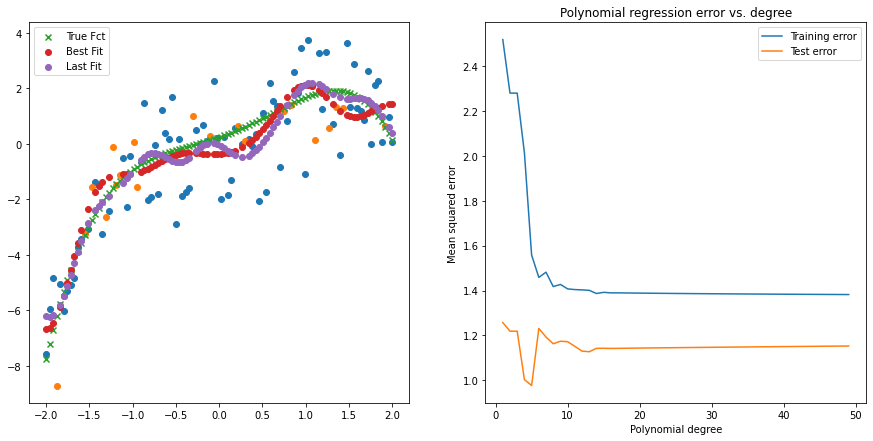

In [102]:
# Plot results
f,ax = plt.subplots(1,2,figsize=(15,7))
# We show the train/test dataset
ax[0].scatter(x_train,y_train)
ax[0].scatter(x_test,y_test)
ax[0].scatter(x,y_f,marker='x',label='True Fct')
ax[0].scatter(x_train,best_pr,label='Best Fit')
ax[0].scatter(x_train,pr_train,label='Last Fit')
ax[0].legend()

# We show the train/test error curve as a function of the degree of the polynomial
ax[1].plot(nFeats, train_errors, label='Training error')
ax[1].plot(nFeats, test_errors, label='Test error')
ax[1].set_xlabel('Polynomial degree')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Polynomial regression error vs. degree')
# ax[1].set_yscale('log')
plt.legend()
plt.show()

## TODO:
* investigate the behavior, for a given number of features, varying the value of $\lambda_2$

In [108]:
numλ = 20
# span the space logarithmically
list_λ = 10**np.linspace(-4,0,numλ)
train_errors = np.zeros(numλ)
test_errors = np.zeros(numλ)

best_err = 1e10
s = 0.1
λ2 = 0.01
feat = 20

for i, λ2 in enumerate(list_λ):
    best_err_train = 1e6
    best_err_test = 1e6

    μ = np.linspace(-2,2,feat)
    X_train_gauss = GaussianBasis(x_train,μ,s)
    X_test_gauss = GaussianBasis(x_test,μ,s) 

    # Fit model
    w = np.linalg.pinv((X_train_gauss.T @ X_train_gauss) + λ2*np.diag(np.ones(feat+1))) @ X_train_gauss.T @ y_train


    # Calculate error
    pr_train = w @ X_train_gauss.T
    pr_test = w @ X_test_gauss.T
    err_train = np.mean((pr_train - y_train) ** 2)
    err_test = np.mean((pr_test - y_test) ** 2)

    if err_test < best_err:
        best_err = err_test
        best_pr = pr_train

    train_errors[i] = err_train
    test_errors[i] = err_test

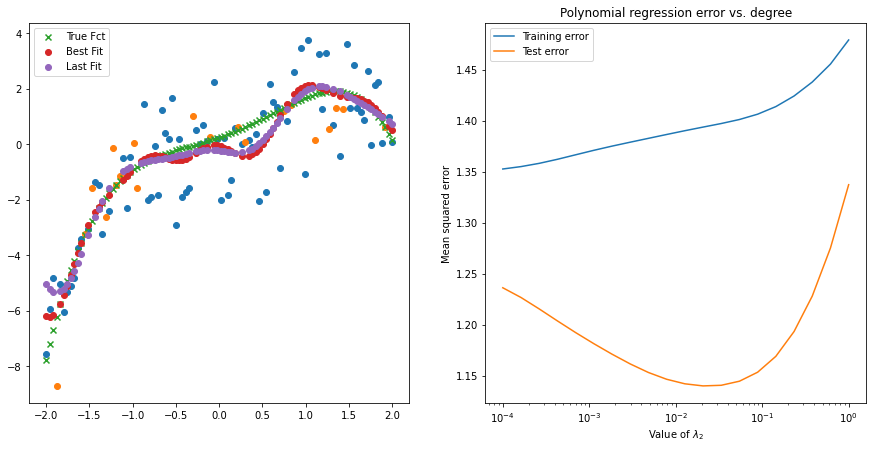

In [112]:
# Plot results
f,ax = plt.subplots(1,2,figsize=(15,7))
# We show the train/test dataset
ax[0].scatter(x_train,y_train)
ax[0].scatter(x_test,y_test)
ax[0].scatter(x,y_f,marker='x',label='True Fct')
ax[0].scatter(x_train,best_pr,label='Best Fit')
ax[0].scatter(x_train,pr_train,label='Last Fit')
ax[0].legend()

# We show the train/test error curve as a function of the degree of the polynomial
ax[1].plot(list_λ, train_errors, label='Training error')
ax[1].plot(list_λ, test_errors, label='Test error')
ax[1].set_xlabel('Value of $\lambda_2$')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Polynomial regression error vs. degree')
ax[1].set_xscale('log')
plt.legend()
plt.show()

## Linear Regression
As a last example, we can look at the results for linear regression in high-dimensional space, to investigate the behavior of the early-stopping criterium. For this case, we need to compute the gradient of the log-likelihood. 

In [204]:
# Generate random dataset with n input features and m samples
np.random.seed(2)
n = 100 # dimension
m = 50 # number of samples
σϵ = 2
X = np.random.normal(size=(m, n))
coef = np.random.random(n)*10-5
y = coef@X.T + np.random.normal(0, σϵ, size=m)

X_test = np.random.normal(size=(m, n))
y_test = coef@X_test.T + np.random.normal(0, σϵ, size=m)

# Add bias term to input data
X = np.c_[np.ones((m, 1)), X]
X_test = np.c_[np.ones((m,1)),X_test]


In [206]:
# Initialize weights to small random values
np.random.seed(1)
weights = np.random.randn(n + 1, 1)

# Define learning rate and number of iterations
lr = 0.1
n_iterations = 100000

# Perform gradient descent
train_errors = np.zeros(n_iterations)
test_errors = np.zeros(n_iterations)

for iteration in range(n_iterations):
    # Calculate predictions and errors
    y_pred = X @ weights
    errors = (y_pred - y.reshape(-1, 1))
    train_errors[iteration] =  np.mean(errors**2)
    
    y_pred_t = X_test @ weights
    test_errors[iteration] =  np.mean((y_pred_t - y_test.reshape(-1, 1))**2)
    
    # Calculate gradient and update weights
    gradient = 2 / m * X.T.dot(errors)
    weights -= lr * gradient

Text(0.5, 0, 'training time')

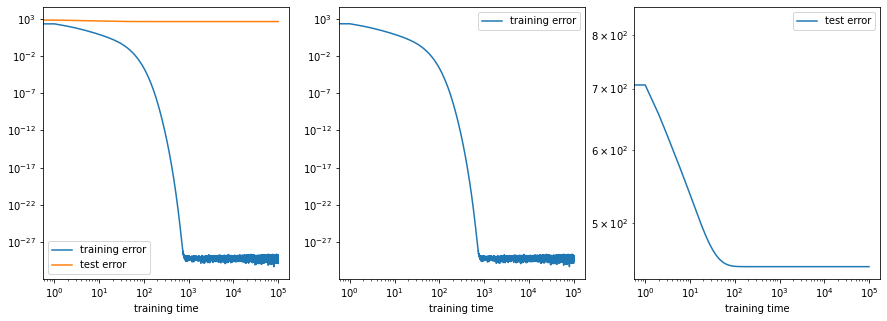

In [207]:
f,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(train_errors,label='training error')
ax[0].plot(test_errors,label='test error')
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].legend()
ax[0].set_xlabel('training time')

ax[1].plot(train_errors,label='training error')
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].legend()
ax[1].set_xlabel('training time')

ax[2].plot(test_errors,label='test error')
ax[2].set_yscale('log')
ax[2].set_xscale('log')
ax[2].legend()
ax[2].set_xlabel('training time')

Show what happen when using always the last points

In [210]:
# Generate random dataset with n input features and m samples
np.random.seed(2)
n = 100 # dimension
allm = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150] # number of samples
allErr_train = []
allErr_test = []
σϵ = 2
for m in allm:
    X = np.random.normal(size=(m, n))
    coef = np.random.random(n)*10-5
    y = coef@X.T + np.random.normal(0, σϵ, size=m)

    X_test = np.random.normal(size=(m, n))
    y_test = coef@X_test.T + np.random.normal(0, σϵ, size=m)

    # Add bias term to input data
    X = np.c_[np.ones((m, 1)), X]
    X_test = np.c_[np.ones((m,1)),X_test]

    # Initialize weights to small random values
    np.random.seed(1)
    weights = np.random.randn(n + 1, 1)

    # Define learning rate and number of iterations
    lr = 0.1
    if m<50:
        lr = 0.02
    n_iterations = 100000

    # Perform gradient descent
    train_errors = np.zeros(n_iterations)
    test_errors = np.zeros(n_iterations)

    for iteration in range(n_iterations):
        # Calculate predictions and errors
        y_pred = X @ weights
        errors = (y_pred - y.reshape(-1, 1))
        train_errors[iteration] =  np.mean(errors**2)

        y_pred_t = X_test @ weights
        test_errors[iteration] =  np.mean((y_pred_t - y_test.reshape(-1, 1))**2)

        # Calculate gradient and update weights
        gradient = 2 / m * X.T.dot(errors)
        weights -= lr * gradient

    
    allErr_train.append(train_errors[-1])
    allErr_test.append(test_errors[-1])

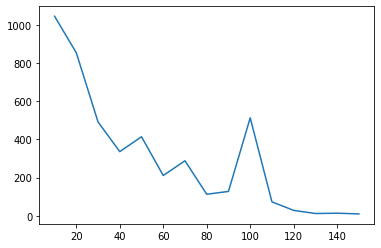

In [212]:
plt.plot(allm,allErr_test)
#plt.plot(allm,allErr_train)
#plt.yscale('log')

In [255]:
10**np.linspace(-2,0,20)

array([0.01      , 0.01274275, 0.01623777, 0.02069138, 0.02636651,
       0.03359818, 0.04281332, 0.05455595, 0.06951928, 0.08858668,
       0.11288379, 0.14384499, 0.18329807, 0.23357215, 0.29763514,
       0.37926902, 0.48329302, 0.61584821, 0.78475997, 1.        ])

In [160]:
print(x_train.shape)
X_ = np.array(x_train**0).reshape(x_train.shape[0],1)
print(X_.shape)
for i in range(9):
    X_ = np.concatenate((X_,(x_train**(i+1)).reshape(x_train.shape[0],1)),1)

(80,)
(80, 1)


In [237]:
np.diag(np.ones(4))

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [236]:
(X_.T @ X_).shape

(10, 10)